In [1]:
#
# Project 1, source code for part B question 3
#

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time

In [12]:
# scale data (set range min and max of 0 and 1 respectively)
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

# Default values
NUM_CLASSES = 7

epochs = 300
batch_size = 32

decay_beta = 10**-3
learning_rate = 10**-3
hidden_layer = 50

seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)

In [13]:
#read train data
def get_data():
    train_input = np.genfromtxt('admission_predict.csv', delimiter= ',')
    trainX, train_Y = train_input[1:,1:8], train_input[1:,-1]
    trainX = scale(trainX, np.min(trainX, axis=0), np.max(trainX, axis=0))
    trainY = train_Y.reshape(train_Y.shape[0], 1)
    
    idx = np.arange(trainX.shape[0])
    np.random.shuffle(idx)
    trainX, trainY = trainX[idx], trainY[idx]
    
    return trainX, trainY

#Split train and test data (70:30)
def split_data(trainX, trainY):
    train_X, test_X, train_Y, test_Y = train_test_split(trainX, trainY, test_size=0.3)
    train_X = (train_X- np.mean(train_X, axis=0))/ np.std(train_X, axis=0)
    print("TrainX: ",train_X.shape)
    print("TestX: ",test_X.shape)
    print("TrainY: ",train_Y.shape)
    print("TestY: ",test_Y.shape)
    return train_X, test_X, train_Y, test_Y

In [14]:
# Generate model
def get_model_3():
    model = keras.Sequential([
        keras.layers.Dense(hidden_layer, use_bias = True, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(decay_beta)),
        keras.layers.Dense(1)
    ])

    SGD_opt = keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=SGD_opt,
                  loss=keras.losses.MeanSquaredError(),
                  metrics=['mse'])
    return model

def get_model_4(isDropout):
    if isDropout:
        model = keras.Sequential([
            keras.layers.Dense(hidden_layer, use_bias = True, activation='relu', 
                               kernel_regularizer = tf.keras.regularizers.l2(decay_beta)),
            keras.layers.Dropout(rate=0.2, seed=seed),
            keras.layers.Dense(hidden_layer, use_bias = True, activation='relu', 
                               kernel_regularizer = tf.keras.regularizers.l2(decay_beta)),
            keras.layers.Dropout(rate=0.2, seed=seed),
            keras.layers.Dense(1)
        ])
    else:
        model = keras.Sequential([
            keras.layers.Dense(hidden_layer, use_bias = True, activation='relu', 
                               kernel_regularizer = tf.keras.regularizers.l2(decay_beta)),
            keras.layers.Dense(hidden_layer, use_bias = True, activation='relu', 
                               kernel_regularizer = tf.keras.regularizers.l2(decay_beta)),
            keras.layers.Dense(1)
        ])

    SGD_opt = keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=SGD_opt,
                  loss=keras.losses.MeanSquaredError(),
                  metrics=['mse'])
    return model

def get_model_5(isDropout):
    if isDropout:
        model = keras.Sequential([
            keras.layers.Dense(hidden_layer, use_bias = True, activation='relu', 
                               kernel_regularizer = tf.keras.regularizers.l2(decay_beta)),
            keras.layers.Dropout(rate=0.2, seed=seed),
            keras.layers.Dense(hidden_layer, use_bias = True, activation='relu', 
                               kernel_regularizer = tf.keras.regularizers.l2(decay_beta)),
            keras.layers.Dropout(rate=0.2, seed=seed),
            keras.layers.Dense(hidden_layer, use_bias = True, activation='relu', 
                               kernel_regularizer = tf.keras.regularizers.l2(decay_beta)),
            keras.layers.Dropout(rate=0.2, seed=seed),
            keras.layers.Dense(1)
        ])
    else:
        model = keras.Sequential([
            keras.layers.Dense(hidden_layer, use_bias = True, activation='relu', 
                               kernel_regularizer = tf.keras.regularizers.l2(decay_beta)),
            keras.layers.Dense(hidden_layer, use_bias = True, activation='relu', 
                               kernel_regularizer = tf.keras.regularizers.l2(decay_beta)),
            keras.layers.Dense(hidden_layer, use_bias = True, activation='relu', 
                               kernel_regularizer = tf.keras.regularizers.l2(decay_beta)),
            keras.layers.Dense(1)
        ])

    SGD_opt = keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=SGD_opt,
                  loss=keras.losses.MeanSquaredError(),
                  metrics=['mse'])
    return model

In [15]:
# Train model
def fit_model(train_X, train_Y, test_X, test_Y, epochs, batch_size, model, isCallback):
    if isCallback:
        # stops training when there is no observed improvement in mse for 5 epochs
        callback = tf.keras.callbacks.EarlyStopping(monitor='mse', min_delta = 0.0001,patience=5)
    else:
        callback = timeCallback()
    history = model.fit(train_X, train_Y,
                        epochs=epochs,
                        callbacks = [callback],
                        verbose = 2,
                        batch_size=batch_size,
                        validation_data = (test_X, test_Y),
                        shuffle=True)
    #timeTaken = np.mean(timeTaken.logs)
    return history, model

In [16]:
# Plot mean squared error for training and test datasets against number of epochs
def plot_mse(mse, mse_test, epochs):
    plt.clf()
    plt.plot(range(epochs), mse)
    plt.plot(range(epochs), mse_test)
    plt.xlabel('No. epochs')
    plt.ylabel('mse')
    plt.legend(['train mse', 'test mse'], loc='lower right')
    plt.title('mse train and test data')

In [17]:
# Function for timing duration per epoch
class timeCallback(tf.keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        self.logs=[]

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(time.time() - self.epoch_start)

In [18]:
# Main code
TrainX, TrainY = get_data()
train_X, test_X, train_Y, test_Y = split_data(TrainX, TrainY)

#3-layer
model_3 = get_model_3()
history_3, model = fit_model(train_X, train_Y, test_X, test_Y, epochs, batch_size, model_3, False)
print("Done fitting model 3\n")

#4-layer
model_4 = get_model_4(False)
history_4, model = fit_model(train_X, train_Y, test_X, test_Y, epochs, batch_size, model_4, False)
print("Done fitting model 4\n")

#4-layer with dropout
model_4_drop = get_model_4(True)
history_4_drop, model = fit_model(train_X, train_Y, test_X, test_Y, epochs, batch_size, model_4_drop, False)
print("Done fitting model 4 with dropout\n")

#5-layer
model_5 = get_model_5(False)
history_5, model = fit_model(train_X, train_Y, test_X, test_Y, epochs, batch_size, model_5, False)
print("Done fitting model 5\n")

#5-layer with dropout
model_5_drop = get_model_4(True)
history_5_drop, model = fit_model(train_X, train_Y, test_X, test_Y, epochs, batch_size, model_5_drop, False)
print("Done fitting model 5 with dropout\n")

TrainX:  (280, 7)
TestX:  (120, 7)
TrainY:  (280, 1)
TestY:  (120, 1)
Epoch 1/300
9/9 - 0s - loss: 1.0017 - mse: 0.9904 - val_loss: 1.0091 - val_mse: 0.9978
Epoch 2/300
9/9 - 0s - loss: 0.8356 - mse: 0.8243 - val_loss: 0.8481 - val_mse: 0.8368
Epoch 3/300
9/9 - 0s - loss: 0.7011 - mse: 0.6899 - val_loss: 0.7147 - val_mse: 0.7034
Epoch 4/300
9/9 - 0s - loss: 0.5907 - mse: 0.5794 - val_loss: 0.6050 - val_mse: 0.5937
Epoch 5/300
9/9 - 0s - loss: 0.5009 - mse: 0.4896 - val_loss: 0.5145 - val_mse: 0.5032
Epoch 6/300
9/9 - 0s - loss: 0.4269 - mse: 0.4156 - val_loss: 0.4381 - val_mse: 0.4268
Epoch 7/300
9/9 - 0s - loss: 0.3656 - mse: 0.3543 - val_loss: 0.3739 - val_mse: 0.3626
Epoch 8/300
9/9 - 0s - loss: 0.3150 - mse: 0.3037 - val_loss: 0.3215 - val_mse: 0.3102
Epoch 9/300
9/9 - 0s - loss: 0.2739 - mse: 0.2627 - val_loss: 0.2772 - val_mse: 0.2659
Epoch 10/300
9/9 - 0s - loss: 0.2399 - mse: 0.2286 - val_loss: 0.2403 - val_mse: 0.2290
Epoch 11/300
9/9 - 0s - loss: 0.2117 - mse: 0.2005 - val_lo

Epoch 94/300
9/9 - 0s - loss: 0.0432 - mse: 0.0320 - val_loss: 0.0273 - val_mse: 0.0161
Epoch 95/300
9/9 - 0s - loss: 0.0429 - mse: 0.0317 - val_loss: 0.0272 - val_mse: 0.0160
Epoch 96/300
9/9 - 0s - loss: 0.0426 - mse: 0.0314 - val_loss: 0.0271 - val_mse: 0.0159
Epoch 97/300
9/9 - 0s - loss: 0.0423 - mse: 0.0311 - val_loss: 0.0271 - val_mse: 0.0159
Epoch 98/300
9/9 - 0s - loss: 0.0421 - mse: 0.0309 - val_loss: 0.0270 - val_mse: 0.0158
Epoch 99/300
9/9 - 0s - loss: 0.0418 - mse: 0.0306 - val_loss: 0.0270 - val_mse: 0.0158
Epoch 100/300
9/9 - 0s - loss: 0.0416 - mse: 0.0304 - val_loss: 0.0269 - val_mse: 0.0157
Epoch 101/300
9/9 - 0s - loss: 0.0413 - mse: 0.0301 - val_loss: 0.0269 - val_mse: 0.0157
Epoch 102/300
9/9 - 0s - loss: 0.0411 - mse: 0.0299 - val_loss: 0.0268 - val_mse: 0.0156
Epoch 103/300
9/9 - 0s - loss: 0.0409 - mse: 0.0297 - val_loss: 0.0268 - val_mse: 0.0156
Epoch 104/300
9/9 - 0s - loss: 0.0406 - mse: 0.0294 - val_loss: 0.0267 - val_mse: 0.0155
Epoch 105/300
9/9 - 0s - lo

Epoch 187/300
9/9 - 0s - loss: 0.0288 - mse: 0.0177 - val_loss: 0.0242 - val_mse: 0.0130
Epoch 188/300
9/9 - 0s - loss: 0.0287 - mse: 0.0176 - val_loss: 0.0242 - val_mse: 0.0130
Epoch 189/300
9/9 - 0s - loss: 0.0286 - mse: 0.0175 - val_loss: 0.0242 - val_mse: 0.0130
Epoch 190/300
9/9 - 0s - loss: 0.0285 - mse: 0.0174 - val_loss: 0.0241 - val_mse: 0.0130
Epoch 191/300
9/9 - 0s - loss: 0.0285 - mse: 0.0173 - val_loss: 0.0241 - val_mse: 0.0130
Epoch 192/300
9/9 - 0s - loss: 0.0284 - mse: 0.0173 - val_loss: 0.0241 - val_mse: 0.0130
Epoch 193/300
9/9 - 0s - loss: 0.0283 - mse: 0.0172 - val_loss: 0.0241 - val_mse: 0.0130
Epoch 194/300
9/9 - 0s - loss: 0.0282 - mse: 0.0171 - val_loss: 0.0241 - val_mse: 0.0130
Epoch 195/300
9/9 - 0s - loss: 0.0281 - mse: 0.0170 - val_loss: 0.0241 - val_mse: 0.0129
Epoch 196/300
9/9 - 0s - loss: 0.0281 - mse: 0.0169 - val_loss: 0.0240 - val_mse: 0.0129
Epoch 197/300
9/9 - 0s - loss: 0.0280 - mse: 0.0169 - val_loss: 0.0240 - val_mse: 0.0129
Epoch 198/300
9/9 - 0

Epoch 280/300
9/9 - 0s - loss: 0.0238 - mse: 0.0127 - val_loss: 0.0232 - val_mse: 0.0122
Epoch 281/300
9/9 - 0s - loss: 0.0238 - mse: 0.0127 - val_loss: 0.0232 - val_mse: 0.0122
Epoch 282/300
9/9 - 0s - loss: 0.0237 - mse: 0.0127 - val_loss: 0.0232 - val_mse: 0.0122
Epoch 283/300
9/9 - 0s - loss: 0.0237 - mse: 0.0126 - val_loss: 0.0232 - val_mse: 0.0122
Epoch 284/300
9/9 - 0s - loss: 0.0237 - mse: 0.0126 - val_loss: 0.0232 - val_mse: 0.0122
Epoch 285/300
9/9 - 0s - loss: 0.0236 - mse: 0.0126 - val_loss: 0.0232 - val_mse: 0.0121
Epoch 286/300
9/9 - 0s - loss: 0.0236 - mse: 0.0125 - val_loss: 0.0232 - val_mse: 0.0121
Epoch 287/300
9/9 - 0s - loss: 0.0236 - mse: 0.0125 - val_loss: 0.0232 - val_mse: 0.0121
Epoch 288/300
9/9 - 0s - loss: 0.0235 - mse: 0.0125 - val_loss: 0.0232 - val_mse: 0.0121
Epoch 289/300
9/9 - 0s - loss: 0.0235 - mse: 0.0124 - val_loss: 0.0232 - val_mse: 0.0121
Epoch 290/300
9/9 - 0s - loss: 0.0235 - mse: 0.0124 - val_loss: 0.0232 - val_mse: 0.0121
Epoch 291/300
9/9 - 0

Epoch 71/300
9/9 - 0s - loss: 0.0840 - mse: 0.0237 - val_loss: 0.0696 - val_mse: 0.0093
Epoch 72/300
9/9 - 0s - loss: 0.0838 - mse: 0.0235 - val_loss: 0.0695 - val_mse: 0.0093
Epoch 73/300
9/9 - 0s - loss: 0.0835 - mse: 0.0233 - val_loss: 0.0695 - val_mse: 0.0093
Epoch 74/300
9/9 - 0s - loss: 0.0833 - mse: 0.0230 - val_loss: 0.0695 - val_mse: 0.0093
Epoch 75/300
9/9 - 0s - loss: 0.0831 - mse: 0.0228 - val_loss: 0.0695 - val_mse: 0.0093
Epoch 76/300
9/9 - 0s - loss: 0.0829 - mse: 0.0226 - val_loss: 0.0695 - val_mse: 0.0093
Epoch 77/300
9/9 - 0s - loss: 0.0827 - mse: 0.0224 - val_loss: 0.0695 - val_mse: 0.0093
Epoch 78/300
9/9 - 0s - loss: 0.0825 - mse: 0.0222 - val_loss: 0.0696 - val_mse: 0.0093
Epoch 79/300
9/9 - 0s - loss: 0.0823 - mse: 0.0220 - val_loss: 0.0696 - val_mse: 0.0093
Epoch 80/300
9/9 - 0s - loss: 0.0821 - mse: 0.0218 - val_loss: 0.0696 - val_mse: 0.0093
Epoch 81/300
9/9 - 0s - loss: 0.0819 - mse: 0.0217 - val_loss: 0.0696 - val_mse: 0.0093
Epoch 82/300
9/9 - 0s - loss: 0.

Epoch 164/300
9/9 - 0s - loss: 0.0733 - mse: 0.0133 - val_loss: 0.0708 - val_mse: 0.0108
Epoch 165/300
9/9 - 0s - loss: 0.0732 - mse: 0.0132 - val_loss: 0.0708 - val_mse: 0.0108
Epoch 166/300
9/9 - 0s - loss: 0.0732 - mse: 0.0132 - val_loss: 0.0708 - val_mse: 0.0108
Epoch 167/300
9/9 - 0s - loss: 0.0731 - mse: 0.0131 - val_loss: 0.0708 - val_mse: 0.0108
Epoch 168/300
9/9 - 0s - loss: 0.0731 - mse: 0.0131 - val_loss: 0.0708 - val_mse: 0.0108
Epoch 169/300
9/9 - 0s - loss: 0.0730 - mse: 0.0130 - val_loss: 0.0709 - val_mse: 0.0109
Epoch 170/300
9/9 - 0s - loss: 0.0730 - mse: 0.0130 - val_loss: 0.0709 - val_mse: 0.0109
Epoch 171/300
9/9 - 0s - loss: 0.0729 - mse: 0.0129 - val_loss: 0.0709 - val_mse: 0.0109
Epoch 172/300
9/9 - 0s - loss: 0.0729 - mse: 0.0129 - val_loss: 0.0709 - val_mse: 0.0109
Epoch 173/300
9/9 - 0s - loss: 0.0728 - mse: 0.0128 - val_loss: 0.0709 - val_mse: 0.0109
Epoch 174/300
9/9 - 0s - loss: 0.0728 - mse: 0.0128 - val_loss: 0.0709 - val_mse: 0.0109
Epoch 175/300
9/9 - 0

Epoch 257/300
9/9 - 0s - loss: 0.0699 - mse: 0.0101 - val_loss: 0.0718 - val_mse: 0.0120
Epoch 258/300
9/9 - 0s - loss: 0.0699 - mse: 0.0101 - val_loss: 0.0718 - val_mse: 0.0120
Epoch 259/300
9/9 - 0s - loss: 0.0698 - mse: 0.0101 - val_loss: 0.0718 - val_mse: 0.0120
Epoch 260/300
9/9 - 0s - loss: 0.0698 - mse: 0.0101 - val_loss: 0.0718 - val_mse: 0.0120
Epoch 261/300
9/9 - 0s - loss: 0.0698 - mse: 0.0100 - val_loss: 0.0718 - val_mse: 0.0120
Epoch 262/300
9/9 - 0s - loss: 0.0698 - mse: 0.0100 - val_loss: 0.0718 - val_mse: 0.0120
Epoch 263/300
9/9 - 0s - loss: 0.0698 - mse: 0.0100 - val_loss: 0.0718 - val_mse: 0.0120
Epoch 264/300
9/9 - 0s - loss: 0.0697 - mse: 0.0100 - val_loss: 0.0718 - val_mse: 0.0121
Epoch 265/300
9/9 - 0s - loss: 0.0697 - mse: 0.0099 - val_loss: 0.0718 - val_mse: 0.0121
Epoch 266/300
9/9 - 0s - loss: 0.0697 - mse: 0.0099 - val_loss: 0.0718 - val_mse: 0.0121
Epoch 267/300
9/9 - 0s - loss: 0.0697 - mse: 0.0099 - val_loss: 0.0718 - val_mse: 0.0121
Epoch 268/300
9/9 - 0

Epoch 50/300
9/9 - 0s - loss: 0.1821 - mse: 0.1204 - val_loss: 0.1136 - val_mse: 0.0518
Epoch 51/300
9/9 - 0s - loss: 0.1839 - mse: 0.1221 - val_loss: 0.1127 - val_mse: 0.0509
Epoch 52/300
9/9 - 0s - loss: 0.1899 - mse: 0.1281 - val_loss: 0.1123 - val_mse: 0.0506
Epoch 53/300
9/9 - 0s - loss: 0.2000 - mse: 0.1382 - val_loss: 0.1123 - val_mse: 0.0505
Epoch 54/300
9/9 - 0s - loss: 0.1929 - mse: 0.1312 - val_loss: 0.1115 - val_mse: 0.0498
Epoch 55/300
9/9 - 0s - loss: 0.1893 - mse: 0.1276 - val_loss: 0.1116 - val_mse: 0.0499
Epoch 56/300
9/9 - 0s - loss: 0.1702 - mse: 0.1085 - val_loss: 0.1118 - val_mse: 0.0500
Epoch 57/300
9/9 - 0s - loss: 0.1890 - mse: 0.1273 - val_loss: 0.1114 - val_mse: 0.0496
Epoch 58/300
9/9 - 0s - loss: 0.1860 - mse: 0.1242 - val_loss: 0.1104 - val_mse: 0.0487
Epoch 59/300
9/9 - 0s - loss: 0.1811 - mse: 0.1194 - val_loss: 0.1101 - val_mse: 0.0484
Epoch 60/300
9/9 - 0s - loss: 0.1755 - mse: 0.1138 - val_loss: 0.1097 - val_mse: 0.0480
Epoch 61/300
9/9 - 0s - loss: 0.

Epoch 143/300
9/9 - 0s - loss: 0.1319 - mse: 0.0707 - val_loss: 0.0867 - val_mse: 0.0255
Epoch 144/300
9/9 - 0s - loss: 0.1364 - mse: 0.0753 - val_loss: 0.0869 - val_mse: 0.0257
Epoch 145/300
9/9 - 0s - loss: 0.1258 - mse: 0.0647 - val_loss: 0.0867 - val_mse: 0.0255
Epoch 146/300
9/9 - 0s - loss: 0.1260 - mse: 0.0648 - val_loss: 0.0864 - val_mse: 0.0252
Epoch 147/300
9/9 - 0s - loss: 0.1330 - mse: 0.0719 - val_loss: 0.0864 - val_mse: 0.0252
Epoch 148/300
9/9 - 0s - loss: 0.1225 - mse: 0.0614 - val_loss: 0.0862 - val_mse: 0.0250
Epoch 149/300
9/9 - 0s - loss: 0.1158 - mse: 0.0546 - val_loss: 0.0865 - val_mse: 0.0253
Epoch 150/300
9/9 - 0s - loss: 0.1292 - mse: 0.0681 - val_loss: 0.0861 - val_mse: 0.0249
Epoch 151/300
9/9 - 0s - loss: 0.1301 - mse: 0.0690 - val_loss: 0.0861 - val_mse: 0.0249
Epoch 152/300
9/9 - 0s - loss: 0.1235 - mse: 0.0624 - val_loss: 0.0860 - val_mse: 0.0248
Epoch 153/300
9/9 - 0s - loss: 0.1406 - mse: 0.0794 - val_loss: 0.0862 - val_mse: 0.0251
Epoch 154/300
9/9 - 0

Epoch 236/300
9/9 - 0s - loss: 0.1112 - mse: 0.0505 - val_loss: 0.0785 - val_mse: 0.0177
Epoch 237/300
9/9 - 0s - loss: 0.1125 - mse: 0.0518 - val_loss: 0.0783 - val_mse: 0.0175
Epoch 238/300
9/9 - 0s - loss: 0.1137 - mse: 0.0530 - val_loss: 0.0782 - val_mse: 0.0175
Epoch 239/300
9/9 - 0s - loss: 0.1105 - mse: 0.0497 - val_loss: 0.0784 - val_mse: 0.0176
Epoch 240/300
9/9 - 0s - loss: 0.1104 - mse: 0.0497 - val_loss: 0.0784 - val_mse: 0.0177
Epoch 241/300
9/9 - 0s - loss: 0.1079 - mse: 0.0472 - val_loss: 0.0784 - val_mse: 0.0177
Epoch 242/300
9/9 - 0s - loss: 0.1081 - mse: 0.0474 - val_loss: 0.0782 - val_mse: 0.0175
Epoch 243/300
9/9 - 0s - loss: 0.1100 - mse: 0.0493 - val_loss: 0.0784 - val_mse: 0.0177
Epoch 244/300
9/9 - 0s - loss: 0.1097 - mse: 0.0490 - val_loss: 0.0782 - val_mse: 0.0176
Epoch 245/300
9/9 - 0s - loss: 0.1074 - mse: 0.0467 - val_loss: 0.0785 - val_mse: 0.0178
Epoch 246/300
9/9 - 0s - loss: 0.1097 - mse: 0.0490 - val_loss: 0.0785 - val_mse: 0.0178
Epoch 247/300
9/9 - 0

Epoch 29/300
9/9 - 0s - loss: 0.1833 - mse: 0.0697 - val_loss: 0.1350 - val_mse: 0.0214
Epoch 30/300
9/9 - 0s - loss: 0.1820 - mse: 0.0684 - val_loss: 0.1345 - val_mse: 0.0208
Epoch 31/300
9/9 - 0s - loss: 0.1807 - mse: 0.0671 - val_loss: 0.1339 - val_mse: 0.0203
Epoch 32/300
9/9 - 0s - loss: 0.1795 - mse: 0.0658 - val_loss: 0.1335 - val_mse: 0.0198
Epoch 33/300
9/9 - 0s - loss: 0.1783 - mse: 0.0646 - val_loss: 0.1330 - val_mse: 0.0194
Epoch 34/300
9/9 - 0s - loss: 0.1771 - mse: 0.0635 - val_loss: 0.1326 - val_mse: 0.0189
Epoch 35/300
9/9 - 0s - loss: 0.1760 - mse: 0.0624 - val_loss: 0.1321 - val_mse: 0.0185
Epoch 36/300
9/9 - 0s - loss: 0.1749 - mse: 0.0613 - val_loss: 0.1318 - val_mse: 0.0181
Epoch 37/300
9/9 - 0s - loss: 0.1738 - mse: 0.0602 - val_loss: 0.1314 - val_mse: 0.0178
Epoch 38/300
9/9 - 0s - loss: 0.1728 - mse: 0.0592 - val_loss: 0.1311 - val_mse: 0.0175
Epoch 39/300
9/9 - 0s - loss: 0.1718 - mse: 0.0582 - val_loss: 0.1308 - val_mse: 0.0172
Epoch 40/300
9/9 - 0s - loss: 0.

Epoch 122/300
9/9 - 0s - loss: 0.1324 - mse: 0.0193 - val_loss: 0.1239 - val_mse: 0.0107
Epoch 123/300
9/9 - 0s - loss: 0.1322 - mse: 0.0191 - val_loss: 0.1239 - val_mse: 0.0107
Epoch 124/300
9/9 - 0s - loss: 0.1320 - mse: 0.0189 - val_loss: 0.1238 - val_mse: 0.0107
Epoch 125/300
9/9 - 0s - loss: 0.1318 - mse: 0.0187 - val_loss: 0.1238 - val_mse: 0.0107
Epoch 126/300
9/9 - 0s - loss: 0.1316 - mse: 0.0185 - val_loss: 0.1238 - val_mse: 0.0107
Epoch 127/300
9/9 - 0s - loss: 0.1315 - mse: 0.0183 - val_loss: 0.1238 - val_mse: 0.0107
Epoch 128/300
9/9 - 0s - loss: 0.1313 - mse: 0.0182 - val_loss: 0.1238 - val_mse: 0.0107
Epoch 129/300
9/9 - 0s - loss: 0.1311 - mse: 0.0180 - val_loss: 0.1238 - val_mse: 0.0107
Epoch 130/300
9/9 - 0s - loss: 0.1309 - mse: 0.0178 - val_loss: 0.1238 - val_mse: 0.0107
Epoch 131/300
9/9 - 0s - loss: 0.1307 - mse: 0.0176 - val_loss: 0.1238 - val_mse: 0.0107
Epoch 132/300
9/9 - 0s - loss: 0.1306 - mse: 0.0175 - val_loss: 0.1238 - val_mse: 0.0107
Epoch 133/300
9/9 - 0

Epoch 215/300
9/9 - 0s - loss: 0.1223 - mse: 0.0096 - val_loss: 0.1238 - val_mse: 0.0111
Epoch 216/300
9/9 - 0s - loss: 0.1222 - mse: 0.0095 - val_loss: 0.1238 - val_mse: 0.0111
Epoch 217/300
9/9 - 0s - loss: 0.1222 - mse: 0.0095 - val_loss: 0.1238 - val_mse: 0.0111
Epoch 218/300
9/9 - 0s - loss: 0.1221 - mse: 0.0094 - val_loss: 0.1238 - val_mse: 0.0111
Epoch 219/300
9/9 - 0s - loss: 0.1221 - mse: 0.0094 - val_loss: 0.1238 - val_mse: 0.0111
Epoch 220/300
9/9 - 0s - loss: 0.1220 - mse: 0.0093 - val_loss: 0.1238 - val_mse: 0.0111
Epoch 221/300
9/9 - 0s - loss: 0.1220 - mse: 0.0093 - val_loss: 0.1238 - val_mse: 0.0111
Epoch 222/300
9/9 - 0s - loss: 0.1219 - mse: 0.0092 - val_loss: 0.1238 - val_mse: 0.0111
Epoch 223/300
9/9 - 0s - loss: 0.1219 - mse: 0.0092 - val_loss: 0.1238 - val_mse: 0.0112
Epoch 224/300
9/9 - 0s - loss: 0.1218 - mse: 0.0091 - val_loss: 0.1238 - val_mse: 0.0112
Epoch 225/300
9/9 - 0s - loss: 0.1218 - mse: 0.0091 - val_loss: 0.1238 - val_mse: 0.0112
Epoch 226/300
9/9 - 0

Epoch 5/300
9/9 - 0s - loss: 0.8053 - mse: 0.7443 - val_loss: 0.4724 - val_mse: 0.4115
Epoch 6/300
9/9 - 0s - loss: 0.6461 - mse: 0.5851 - val_loss: 0.3888 - val_mse: 0.3279
Epoch 7/300
9/9 - 0s - loss: 0.4905 - mse: 0.4295 - val_loss: 0.3293 - val_mse: 0.2684
Epoch 8/300
9/9 - 0s - loss: 0.4760 - mse: 0.4151 - val_loss: 0.2797 - val_mse: 0.2188
Epoch 9/300
9/9 - 0s - loss: 0.3887 - mse: 0.3277 - val_loss: 0.2404 - val_mse: 0.1795
Epoch 10/300
9/9 - 0s - loss: 0.3438 - mse: 0.2829 - val_loss: 0.2081 - val_mse: 0.1472
Epoch 11/300
9/9 - 0s - loss: 0.2911 - mse: 0.2302 - val_loss: 0.1882 - val_mse: 0.1273
Epoch 12/300
9/9 - 0s - loss: 0.3444 - mse: 0.2835 - val_loss: 0.1688 - val_mse: 0.1080
Epoch 13/300
9/9 - 0s - loss: 0.2796 - mse: 0.2187 - val_loss: 0.1544 - val_mse: 0.0935
Epoch 14/300
9/9 - 0s - loss: 0.2337 - mse: 0.1728 - val_loss: 0.1429 - val_mse: 0.0821
Epoch 15/300
9/9 - 0s - loss: 0.2497 - mse: 0.1888 - val_loss: 0.1324 - val_mse: 0.0716
Epoch 16/300
9/9 - 0s - loss: 0.2309 

Epoch 99/300
9/9 - 0s - loss: 0.1332 - mse: 0.0729 - val_loss: 0.0753 - val_mse: 0.0151
Epoch 100/300
9/9 - 0s - loss: 0.1392 - mse: 0.0789 - val_loss: 0.0754 - val_mse: 0.0151
Epoch 101/300
9/9 - 0s - loss: 0.1314 - mse: 0.0711 - val_loss: 0.0755 - val_mse: 0.0153
Epoch 102/300
9/9 - 0s - loss: 0.1480 - mse: 0.0877 - val_loss: 0.0754 - val_mse: 0.0152
Epoch 103/300
9/9 - 0s - loss: 0.1341 - mse: 0.0739 - val_loss: 0.0757 - val_mse: 0.0155
Epoch 104/300
9/9 - 0s - loss: 0.1418 - mse: 0.0816 - val_loss: 0.0755 - val_mse: 0.0153
Epoch 105/300
9/9 - 0s - loss: 0.1361 - mse: 0.0759 - val_loss: 0.0754 - val_mse: 0.0152
Epoch 106/300
9/9 - 0s - loss: 0.1312 - mse: 0.0710 - val_loss: 0.0754 - val_mse: 0.0152
Epoch 107/300
9/9 - 0s - loss: 0.1317 - mse: 0.0715 - val_loss: 0.0751 - val_mse: 0.0149
Epoch 108/300
9/9 - 0s - loss: 0.1283 - mse: 0.0681 - val_loss: 0.0745 - val_mse: 0.0143
Epoch 109/300
9/9 - 0s - loss: 0.1383 - mse: 0.0781 - val_loss: 0.0746 - val_mse: 0.0144
Epoch 110/300
9/9 - 0s

Epoch 192/300
9/9 - 0s - loss: 0.1124 - mse: 0.0527 - val_loss: 0.0731 - val_mse: 0.0134
Epoch 193/300
9/9 - 0s - loss: 0.1154 - mse: 0.0557 - val_loss: 0.0732 - val_mse: 0.0134
Epoch 194/300
9/9 - 0s - loss: 0.1121 - mse: 0.0524 - val_loss: 0.0733 - val_mse: 0.0136
Epoch 195/300
9/9 - 0s - loss: 0.1079 - mse: 0.0482 - val_loss: 0.0732 - val_mse: 0.0135
Epoch 196/300
9/9 - 0s - loss: 0.1123 - mse: 0.0526 - val_loss: 0.0731 - val_mse: 0.0134
Epoch 197/300
9/9 - 0s - loss: 0.1111 - mse: 0.0514 - val_loss: 0.0730 - val_mse: 0.0133
Epoch 198/300
9/9 - 0s - loss: 0.1114 - mse: 0.0517 - val_loss: 0.0730 - val_mse: 0.0133
Epoch 199/300
9/9 - 0s - loss: 0.1141 - mse: 0.0544 - val_loss: 0.0730 - val_mse: 0.0134
Epoch 200/300
9/9 - 0s - loss: 0.1191 - mse: 0.0595 - val_loss: 0.0729 - val_mse: 0.0132
Epoch 201/300
9/9 - 0s - loss: 0.1012 - mse: 0.0415 - val_loss: 0.0728 - val_mse: 0.0131
Epoch 202/300
9/9 - 0s - loss: 0.1133 - mse: 0.0536 - val_loss: 0.0729 - val_mse: 0.0132
Epoch 203/300
9/9 - 0

Epoch 285/300
9/9 - 0s - loss: 0.1016 - mse: 0.0423 - val_loss: 0.0724 - val_mse: 0.0132
Epoch 286/300
9/9 - 0s - loss: 0.0993 - mse: 0.0400 - val_loss: 0.0725 - val_mse: 0.0132
Epoch 287/300
9/9 - 0s - loss: 0.0914 - mse: 0.0321 - val_loss: 0.0725 - val_mse: 0.0132
Epoch 288/300
9/9 - 0s - loss: 0.0963 - mse: 0.0370 - val_loss: 0.0725 - val_mse: 0.0132
Epoch 289/300
9/9 - 0s - loss: 0.0999 - mse: 0.0407 - val_loss: 0.0725 - val_mse: 0.0133
Epoch 290/300
9/9 - 0s - loss: 0.0901 - mse: 0.0309 - val_loss: 0.0725 - val_mse: 0.0133
Epoch 291/300
9/9 - 0s - loss: 0.0969 - mse: 0.0377 - val_loss: 0.0725 - val_mse: 0.0132
Epoch 292/300
9/9 - 0s - loss: 0.0981 - mse: 0.0388 - val_loss: 0.0725 - val_mse: 0.0133
Epoch 293/300
9/9 - 0s - loss: 0.0954 - mse: 0.0362 - val_loss: 0.0726 - val_mse: 0.0134
Epoch 294/300
9/9 - 0s - loss: 0.0963 - mse: 0.0371 - val_loss: 0.0726 - val_mse: 0.0134
Epoch 295/300
9/9 - 0s - loss: 0.0957 - mse: 0.0365 - val_loss: 0.0727 - val_mse: 0.0135
Epoch 296/300
9/9 - 0

Text(0.5, 1.0, 'Comparisons of performance of different layer models')

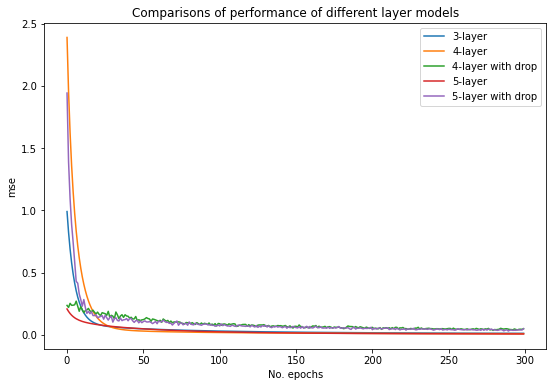

In [19]:
# Visualization of performance measured by mse (training data)
plt.figure(figsize=(9,6))
plt.plot(range(epochs), history_3.history['mse'])
plt.plot(range(epochs), history_4.history['mse'])
plt.plot(range(epochs), history_4_drop.history['mse'])
plt.plot(range(epochs), history_5.history['mse'])
plt.plot(range(epochs), history_5_drop.history['mse'])
plt.xlabel('No. epochs')
plt.ylabel('mse')
plt.legend(['3-layer', '4-layer', '4-layer with drop', '5-layer', '5-layer with drop'], loc='upper right')
plt.title('Comparisons of performance of different layer models')

(0.0, 0.1)

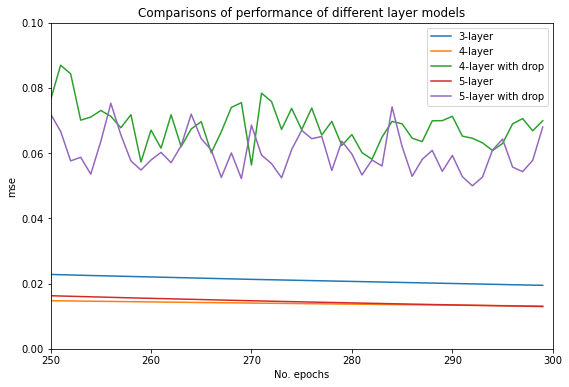

In [10]:
#Previous graph zoomed in
plt.figure(figsize=(9,6))
plt.plot(range(epochs), history_3.history['mse'])
plt.plot(range(epochs), history_4.history['mse'])
plt.plot(range(epochs), history_4_drop.history['mse'])
plt.plot(range(epochs), history_5.history['mse'])
plt.plot(range(epochs), history_5_drop.history['mse'])
plt.xlabel('No. epochs')
plt.ylabel('mse')
plt.legend(['3-layer', '4-layer', '4-layer with drop', '5-layer', '5-layer with drop'], loc='upper right')
plt.title('Comparisons of performance of different layer models')
plt.xlim(250,300)
plt.ylim(0,0.1)

Text(0.5, 1.0, 'Comparisons of performance of different layer models (test MSE)')

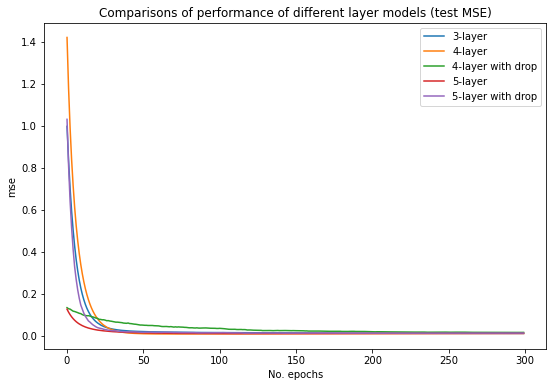

In [20]:
# Visualization of performance measured by mse (test data)
plt.figure(figsize=(9,6))
plt.plot(range(epochs), history_3.history['val_mse'])
plt.plot(range(epochs), history_4.history['val_mse'])
plt.plot(range(epochs), history_4_drop.history['val_mse'])
plt.plot(range(epochs), history_5.history['val_mse'])
plt.plot(range(epochs), history_5_drop.history['val_mse'])
plt.xlabel('No. epochs')
plt.ylabel('mse')
plt.legend(['3-layer', '4-layer', '4-layer with drop', '5-layer', '5-layer with drop'], loc='upper right')
plt.title('Comparisons of performance of different layer models (test MSE)')

(0.01, 0.02)

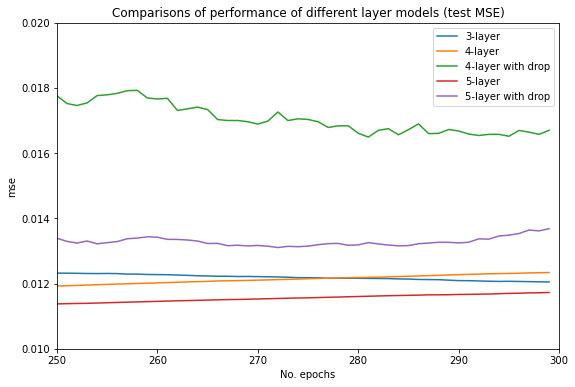

In [25]:
# Previous graph zoomed in
plt.figure(figsize=(9,6))
plt.plot(range(epochs), history_3.history['val_mse'])
plt.plot(range(epochs), history_4.history['val_mse'])
plt.plot(range(epochs), history_4_drop.history['val_mse'])
plt.plot(range(epochs), history_5.history['val_mse'])
plt.plot(range(epochs), history_5_drop.history['val_mse'])
plt.xlabel('No. epochs')
plt.ylabel('mse')
plt.legend(['3-layer', '4-layer', '4-layer with drop', '5-layer', '5-layer with drop'], loc='upper right')
plt.title('Comparisons of performance of different layer models (test MSE)')
plt.xlim(250,300)
plt.ylim(0.01,0.02)

Text(0.5, 1.0, 'Comparisons of perfomance of different layer models (loss)')

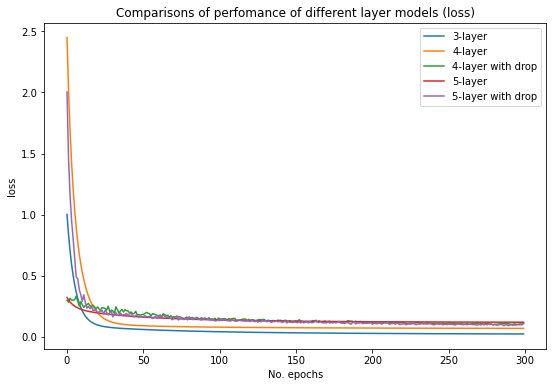

In [26]:
# Visualization of performance measured by loss (training data)
plt.figure(figsize=(9,6))
plt.plot(range(epochs), history_3.history['loss'])
plt.plot(range(epochs), history_4.history['loss'])
plt.plot(range(epochs), history_4_drop.history['loss'])
plt.plot(range(epochs), history_5.history['loss'])
plt.plot(range(epochs), history_5_drop.history['loss'])
plt.xlabel('No. epochs')
plt.ylabel('loss')
plt.legend(['3-layer', '4-layer', '4-layer with drop', '5-layer', '5-layer with drop'], loc='upper right')
plt.title('Comparisons of perfomance of different layer models (loss)')

(0.0, 0.25)

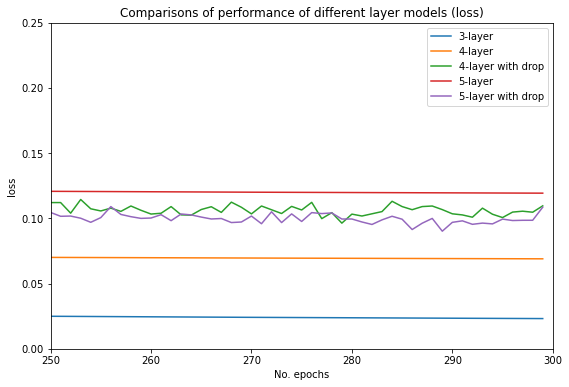

In [27]:
# Previous graph zoomed in
plt.figure(figsize=(9,6))
plt.plot(range(epochs), history_3.history['loss'])
plt.plot(range(epochs), history_4.history['loss'])
plt.plot(range(epochs), history_4_drop.history['loss'])
plt.plot(range(epochs), history_5.history['loss'])
plt.plot(range(epochs), history_5_drop.history['loss'])
plt.xlabel('No. epochs')
plt.ylabel('loss')
plt.legend(['3-layer', '4-layer', '4-layer with drop', '5-layer', '5-layer with drop'], loc='upper right')
plt.title('Comparisons of performance of different layer models (loss)')
plt.xlim(250,300)
plt.ylim(0,0.25)

Text(0.5, 1.0, 'Comparisons of performance of different layer models (test loss)')

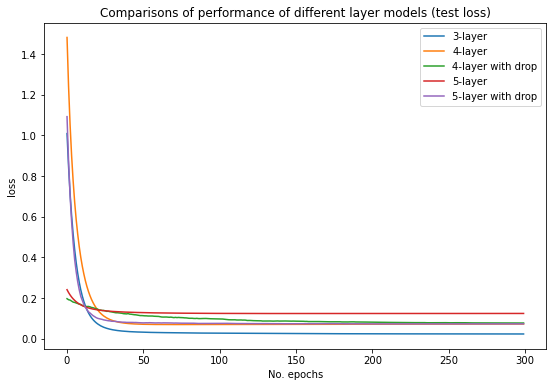

In [28]:
# Visualization of performance measured by loss (test data)
plt.figure(figsize=(9,6))
plt.plot(range(epochs), history_3.history['val_loss'])
plt.plot(range(epochs), history_4.history['val_loss'])
plt.plot(range(epochs), history_4_drop.history['val_loss'])
plt.plot(range(epochs), history_5.history['val_loss'])
plt.plot(range(epochs), history_5_drop.history['val_loss'])
plt.xlabel('No. epochs')
plt.ylabel('loss')
plt.legend(['3-layer', '4-layer', '4-layer with drop', '5-layer', '5-layer with drop'], loc='upper right')
plt.title('Comparisons of performance of different layer models (test loss)')

(0.0, 0.2)

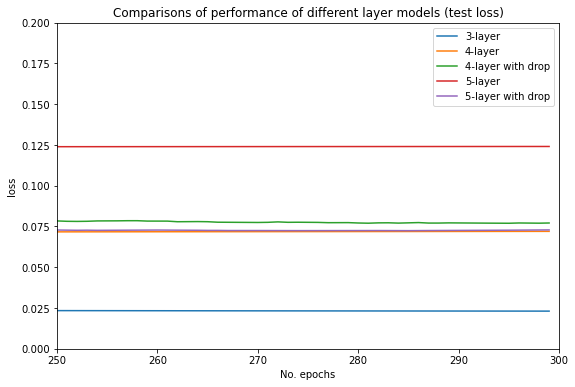

In [29]:
# Previous graph zoomed in
plt.figure(figsize=(9,6))
plt.plot(range(epochs), history_3.history['val_loss'])
plt.plot(range(epochs), history_4.history['val_loss'])
plt.plot(range(epochs), history_4_drop.history['val_loss'])
plt.plot(range(epochs), history_5.history['val_loss'])
plt.plot(range(epochs), history_5_drop.history['val_loss'])
plt.xlabel('No. epochs')
plt.ylabel('loss')
plt.legend(['3-layer', '4-layer', '4-layer with drop', '5-layer', '5-layer with drop'], loc='upper right')
plt.title('Comparisons of performance of different layer models (test loss)')
plt.xlim(250,300)
plt.ylim(0,0.2)